<center><h1>k-Mean-Clustering<center>
    

In [ ]:
Datos: 

In [1]:
# Advertencias suprimidas:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

La función random.seed inicializa el generador de números aleatorios.

In [5]:
#Array aleatorio
np.random.seed(0)

Crearemos grupos aleatorios.

La clase make_blobs puede aceptar muchas entradas, pero usaremos estas específicas.

*Input

**n_samples:** el número total de puntos divididos equitativamente entre grupos.
El valor será: 5000

**centers:** El número de centros a generar, o las ubicaciones de los centros fijos.
El valor será: [[4, 4], [-2, -1], [2, -3],[1,1]]

**cluster_std:** la desviación estándar de los clústeres.
El valor será: 0.9


*Output

**X:** matriz de forma [n_muestras, n_características]. (Matriz de funciones)
Las muestras generadas.

**y:** Matriz de forma [n_muestras]. (Vector de respuesta)

Las etiquetas de enteros para la pertenencia a grupos de cada muestra.

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Ploteamos con diagrama de dispersión los valores generados aleatoriamente

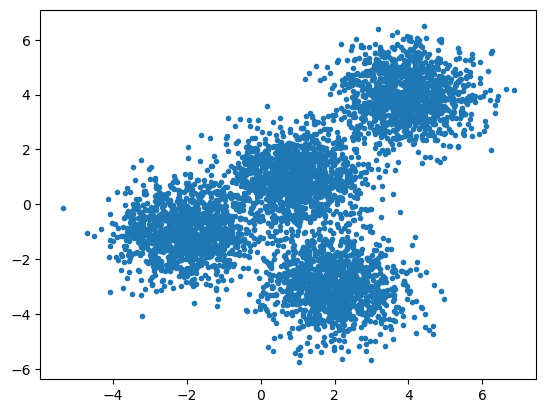

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

**Configuración de K-Means**

La clase KMeans tiene muchos parámetro, usaremos solamente los siguientes tres:

**init:** Método de inicialización de los centroides.
El valor será: "k-means++"(selecciona los centros de clúster iniciales para el agrupamiento k-means de una manera inteligente para acelerar la convergencia)

**n_clusters:** el número de clústeres a formar, así como el número de centroides a generar.
El valor será: 4 (ya que tenemos 4 centros)

**n_init:** número de veces que se ejecutará el algoritmo k-means con diferentes clúster de centroide. Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas en términos de inercia.
El valor será: 12

Inicialice KMeans con estos parámetros, donde el parámetro de salida se llama k_means.

In [11]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [12]:
#Entrenamos
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Usaremos las etiquetas para los puntos de datos. Usando el atributo .labels_ de KMeans y guárdelo como k_means_labels 

In [13]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

Usaremos **.cluster_centers_** de KMeans y guárdelo como k_means_cluster_centers .

In [14]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 1.99741008, -3.01666822],
       [ 0.96900523,  0.98370298]])

**Creamos la visualización gráfica**

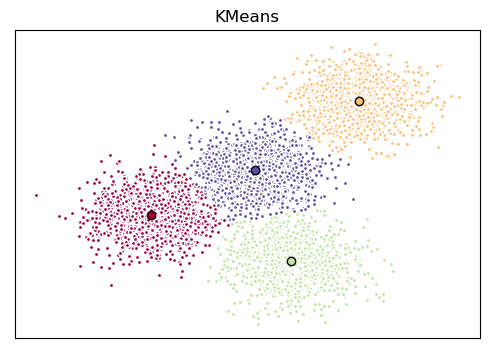

In [15]:
# Fijamos las dimensiones del gráfico.
fig = plt.figure(figsize=(6, 4))

# Configuramos el color del mapa de calor Spectral
# Usaremos el número de etqiquetas que hay en K-mean_labels
#np.linspace, devuelve una referencia a un array de una dimensión cuyos 
#elementos son la secuencia de n valores equidistantes desde inicio hasta fin . np. random.

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Creamos el plot
ax = fig.add_subplot(1, 1, 1)

# Aplicamos cadena de puntos y centroides
# k will range from 0-3, Coincide con la cantidad de clústeres.

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

   #Crear una lista de puntos, que devuelve un booleano: verdadero o falso, si estan eqiquetas o no
    my_members = (k_means_labels == k)
    
    # Define el centroide en clúster centrar.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots datos de puntos con el color col
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Traza los centroides con el color especificado, pero con un contorno más oscuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título del gráfico
ax.set_title('KMeans')

# Remove eje de las abscisas
ax.set_xticks(())

# Remover eje de las ordenadas
ax.set_yticks(())

# Muestra el gráfico
plt.show()


**Probemos generando 3 clústeres**

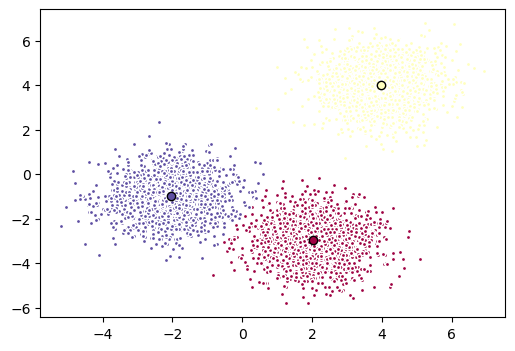

In [28]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

#Entrenamos
k_means3.fit(X)

# Fijamos las dimensiones del gráfico.
fig = plt.figure(figsize=(6, 4))


colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))

# Creamos el plot
ax = fig.add_subplot(1, 1, 1)

# Aplicamos cadena de puntos y centroides
# k will range from 0-3, Coincide con la cantidad de clústeres.

for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()



**Segmentación de Clientes con K-Means**

In [31]:
import pandas as pd
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [33]:
df.describe()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [34]:
df.shape


(850, 10)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [36]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Normalizamos**

In [38]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

**Modelamos**

In [39]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

**Insights**

*Definimos las etiquetas

In [40]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Asignamos las etiquetas a cada fila en el Podemos verificar fácilmente los valores del centroide promediando las características en cada cluster.dataframe.

In [41]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


**Ploteamos**

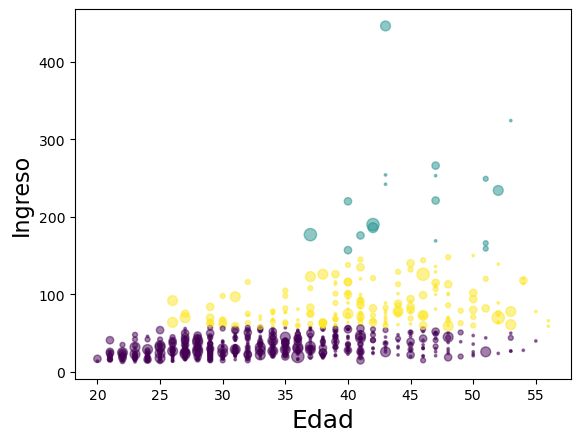

In [43]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Ingreso', fontsize=16)

plt.show()

**Incorporamos la varaible Educación Axes 3D**

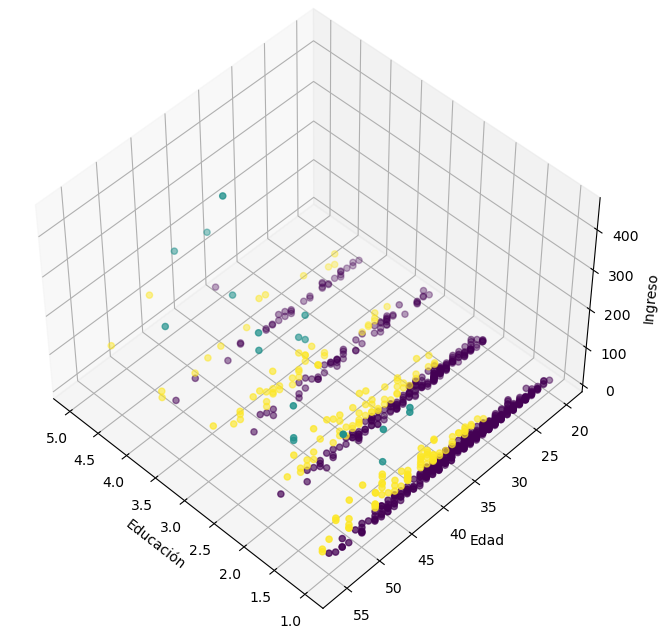

In [44]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Educación')
ax.set_ylabel('Edad')
ax.set_zlabel('Ingreso')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


*Los clientes pueden ser clasificados según atributos similares. K-Means ananáliza de acuerdo a estsos atributos en tres clústeres que pueden llamarse:
 
-AFORTUNADOS, EDUCADOS Y ANCIANOS

-EDAD MEDIA Y RENTA MEDIA

-JÓVENES Y DE BAJOS INGRESOS